# MCMC - Importance sampling

\begin{align*}
p( \mathbf y | \mathbf X, \mathbf\theta) = \Pi_i p(y_i | f(x_i, \mathbf \theta) )
\end{align*}

We shall also assume a Gaussian Prior:

\begin{equation}
p(\mathbf \theta) = \frac 1 {\sqrt {2 \pi \sigma^2}} \exp \Big(- \frac {(\theta - \mu_{theta})^{\top} (\theta - \mu_{theta}) } {2 \sigma ^2 } \Big)
\end{equation}

Under these circumstances, the posterior distribution:

\begin{align*}
p(\mathbf \theta | \mathbf X, \mathbf y) = \frac 1 z p(\mathbf y | \mathbf X, \mathbf \theta) p(\mathbf \theta)
\end{align*}

Let us assume that we have the integral

\begin{align*}
z & = \int p(y|\theta)p(\theta)d\theta \\
  & = \int \frac {p(y|\theta)p(\theta)} {q(\theta)} q(\theta) d\theta \\
  & = \int w(\theta) q(\theta) d\theta
\end{align*}

Here, we shall be able to chose _any_ $w(\theta)$ that we want to chose. We shall typically choose a $w(\theta)$ that resembles a Gaussian:

\begin{equation}
q(\theta) = \mathcal {N}(0, 1000)
\end{equation}

i.e. we assume that the $q$ spans a large space in the $\theta$ dimension. Remember that there is nothing preventing one from using a larger dimension for theta.

## Importance sampling

Here, we shall convert the operation into a summation operation:

\begin{align*}
 z &= \int w(\theta) q(\theta) d\theta \\
   &= \frac 1 N \Sigma_i w( \theta_i )
\end{align*}



## Doing this with some data ...

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

def plotDistributions(dists, names=None, N=100):
    
    plt.figure(figsize=(10,10))
    for i, (mu, Sigma) in enumerate(dists):
        
        name = f'{i}'
        try:
            name = names[i]
        except:
            pass
            
        x, y = multivariate_normal(mu.flatten(), Sigma, N).T
        plt.plot(x, y, 's', alpha=0.1, label=name)
        
    plt.legend()
    plt.show()
    plt.close()
    return

def generateData(mu, Sigma, N=100):
    
    X = np.random.rand(N, 2)
    theta = multivariate_normal(mu.flatten(), Sigma, N)
    y = (X * theta).sum(axis=1).reshape((-1, 1))
    
    return X, y

def pY_theta(X, y, theta, sigma=1):
    '''
    N = number of samples
    M = number of axes
            X : NxM
            y : Nx1
        theta : NxM
    '''
    
    yHat = (X * theta).sum(axis=1).reshape((-1, 1))
    err = (y - yHat)
    prob = np.exp( (-0.5/(sigma**2)) * err.T @ err  ).flatten()
    
    return prob[0]


In [115]:
mu_prior = np.array([0,0]).reshape(-1, 1)
si_prior = 5 * np.eye(2)

mu_actual = np.array([12,7]).reshape(-1, 1)
si_actual = np.eye(2)*1

X, y = generateData(mu_actual, si_actual, N=10)

theta_1 = multivariate_normal(mu_prior.flatten(), si_prior, 10)
theta_2 = multivariate_normal(mu_actual.flatten(), si_actual, 10)
print(f'prior = {pY_theta(X, y, theta_1, sigma=1)}')
print(f'actual = {pY_theta(X, y, theta_2, sigma=1)}')



prior = 2.8853089468017e-311
actual = 0.06039004603614953


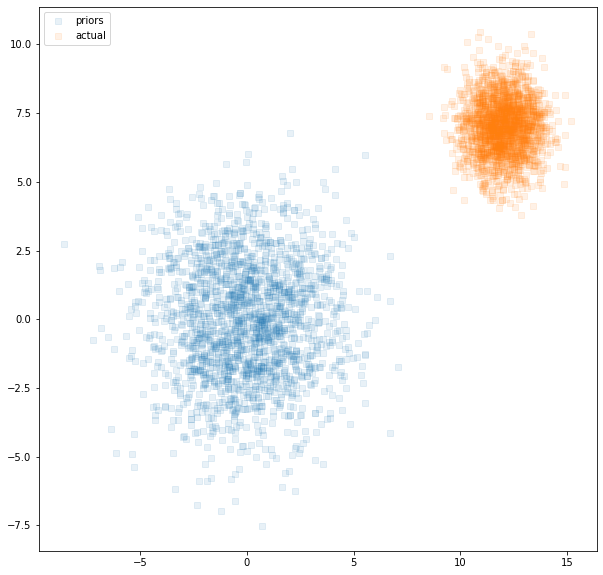

In [100]:
dists = [
    (mu_prior, si_prior),
    (mu_actual, si_actual)
]

names = [
    'priors', 'actual'
]

plotDistributions(dists, names, N=2000)

## Cholesky Decomposition

In [18]:
import numpy as np
A = np.array([
    [1   ,  0.5, 0.25],
    [0.5 ,   1, 0.5],
    [0.25, 0.5, 1]
])
B = np.linalg.cholesky(A)
B @ B.T

array([[1.  , 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 1.  ]])